In [1]:
path_directory = r'C:\Users\admin\Documents\py\Great Learning\Computer Vision with CNNs\Project 1'

In [2]:
path_directory

'C:\\Users\\admin\\Documents\\py\\Great Learning\\Computer Vision with CNNs\\Project 1'

In [3]:
import zipfile
with zipfile.ZipFile('Dataset - Images.zip', 'r') as zip_ref:
    zip_ref.extractall(path_directory)

In [4]:
import os
os.chdir(path_directory)

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'CNN - Project 1.pdf',
 'Dataset - Images.zip',
 'Dataset - Plant-seedlings-classification.zip',
 'hupyperameter-DT.ipynb',
 'hyperparameter-DNN.ipynb',
 'Images',
 'Plants Prediction.csv',
 'Project 1 - Part II.ipynb',
 'Project 1.ipynb',
 'sample_submission.csv',
 'test',
 'train']

In [6]:
os.chdir('Images')

In [7]:
os.listdir()

['00001.jpg',
 '00002.jpg',
 '00003.jpg',
 '00004.jpg',
 '00005.jpg',
 '00006.jpg',
 '00007.jpg',
 '00008.jpg',
 '00009.jpg',
 '00010.jpg',
 '00011.jpg',
 '00012.jpg',
 '00013.jpg',
 '00014.jpg',
 '00015.jpg']

In [8]:
import cv2
X = []

for i in os.listdir():
    temp = cv2.imread(i)
    temp = cv2.resize(temp, (224,224))
    X.append(temp)

In [9]:
import numpy as np
X_arr = np.array(X, dtype = np.float32)
X_arr.shape

(15, 224, 224, 3)

In [10]:
X_scale = X_arr / 255

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input, Activation

In [12]:
datagen = ImageDataGenerator(rotation_range = 20,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            brightness_range = [0.6, 1.1],
                            rescale = 1./255,
                            validation_split = 0.1) 

In [13]:
image_file = path_directory + '/Images' +  '/00002.jpg'

In [14]:
image_file

'C:\\Users\\admin\\Documents\\py\\Great Learning\\Computer Vision with CNNs\\Project 1/Images/00002.jpg'

In [15]:
img_view = tf.keras.preprocessing.image.load_img(image_file)

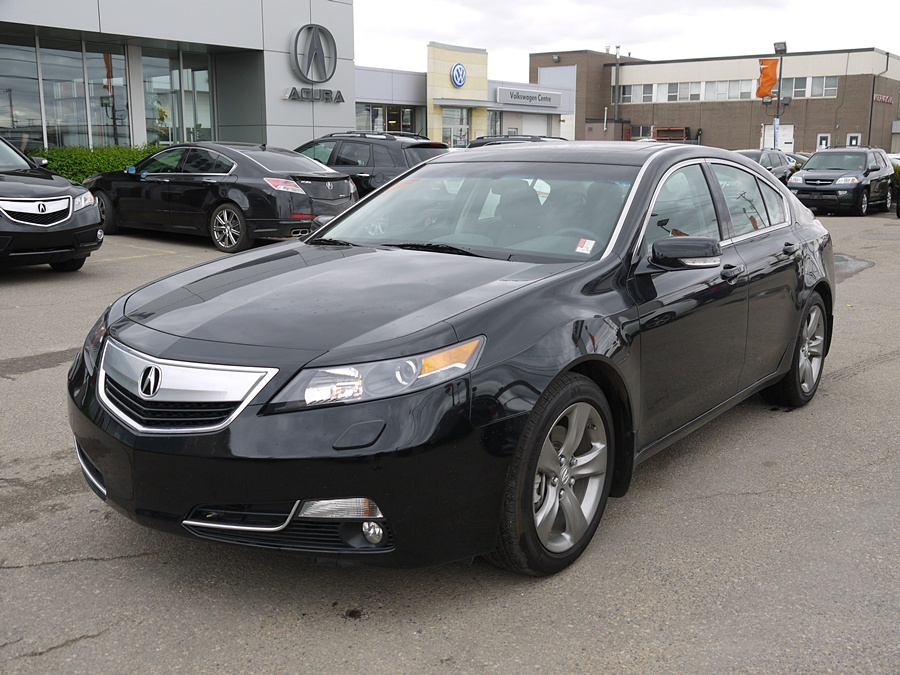

In [16]:
img_view

In [17]:
img_arr = tf.keras.preprocessing.image.img_to_array(img_view)

In [18]:
img_arr.shape

(675, 900, 3)

In [19]:
img_arr_temp = img_arr.reshape((1,) + img_arr.shape)
img_arr_temp.shape

(1, 675, 900, 3)

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (124,124)

In [40]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Input(shape = (224,224,3)))

model.add(Conv2D(128, kernel_size = (3,3), kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size = (3,3), kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(256, kernel_size = (3,3), kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size = (3,3), kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, kernel_size = (3,3), kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, kernel_size = (3,3), kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(256, kernel_size = (3,3), kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, kernel_size = (3,3), kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D())

model.add(Dense(150528, activation = 'softmax')) # An optional number getting by calculating the number

In [41]:
model.compile(loss = 'categorical_crossentropy', metrics = ['acc'], optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 128)     3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 128)     512       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 128)     147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 128)     512       
_________________________________________________________________
activation_1 (Activation)    (None, 220, 220, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 128)     0

In [24]:
X_scale.shape

(15, 224, 224, 3)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, X_scale, test_size = 0.2)

In [37]:
y_train = y_train.reshape(12, 224*224*3)
y_test = y_test.reshape(3, 224*224*3)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(12, 224, 224, 3)
(12, 150528)
(3, 224, 224, 3)
(3, 150528)


In [43]:
model.fit_generator(datagen.flow(X_train, y_train),
                   epochs = 1,
                   validation_data = (X_test, y_test))

1/1 [==============================] - 1s 1s/step - loss: 877538.5000 - acc: 0.0000e+00 - val_loss: 887451.2500 - val_acc: 0.0000e+00


### Review

In this project, there are lots of difficulties we've faced. The challenges endured during the work have shown below.

 - The dataset's description was not clear enough, hence can't determine the project.
 - The images in the data are were fewer, so it's not performing well in convolution even with augmentation.
 - All images differ from each other, therefore there is no similarity between the cars.
 - As we've mentioned above in the description, the output is not identified because no labels or classes presented in the data, with the augmentation, we couldn't split the data into training and validation, and also, during the making of architecture, we didn't know what to write in the output layer (In the output layer, for the simplicity, the number 150528 in the output layer from the architecture has derived from the last section of the code, where we've resized the shape of y [Indirectly X]).

Experimentally, We've also tried to manipulate the data, where the dependent feature has taken the same as the independent feature, but it didn't work. For this dataset, let's just say, it is more like a semi-supervised or unsupervised problem, where we've to identify the label by ourselves. So there might be a solution for this dataset or any other similar data, where we can use AutoEncoder. AutoEncoder is famous for the dimensionality reduction technique. It reduces the dimensions of X features into lower dimensions via a hidden layer, with the help of that, we can also get the original dimensions as output. In conclusion, we can use AutoEncoder to the dataset, reduce the dimension, and then label it for future work.